In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append('../../')
from containers import Ligand, Protein
from shared_paths import shared_paths, proteins
from score.scores import ScoreContainer
from score.prob_opt import PredictStructs
%matplotlib inline

In [2]:
print(proteins), len(proteins)

['B2AR', 'B1AR', 'DAT', 'PLAU', 'PTPN1', 'BACE1', 'TRPV1', 'MEK1', 'F10', 'SIGMAR1', 'MGLUR5', 'ELANE', '5HT2B', 'DHFR', 'SMO', 'BRD4', 'CHRM3', 'F11', 'MAPK14', 'A2AR', 'P00760', 'CDK2', 'NR3C2', 'JAK2', 'CHK1', 'GLUT1', 'VDR', 'PDE10A', 'PYGM', 'NR3C1', 'BRAF', 'SLC6A4', 'F2', 'AR', 'ERA', 'PLK1', 'HSP90AA1']


(None, 37)

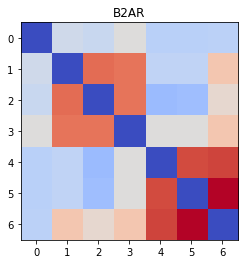

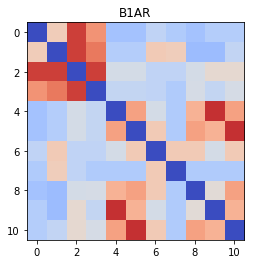

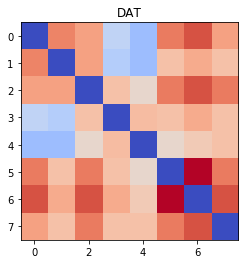

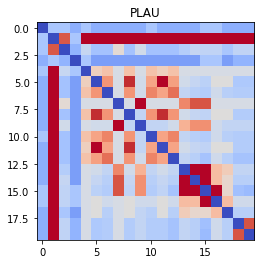

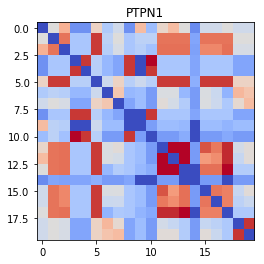

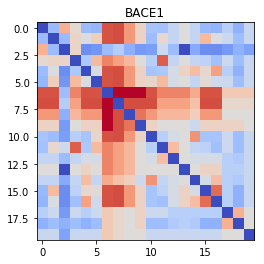

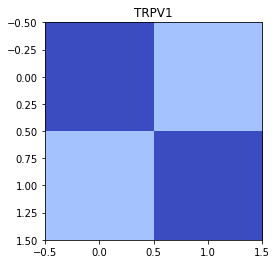

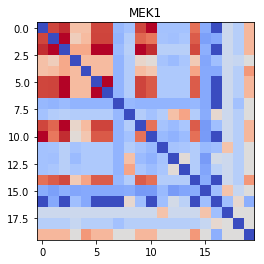

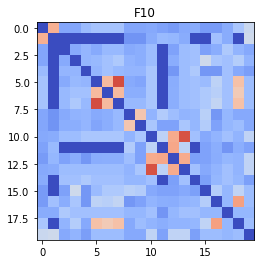

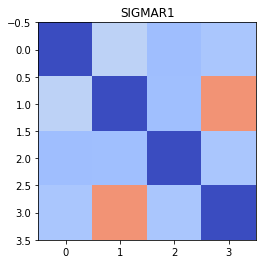

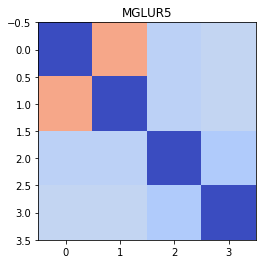

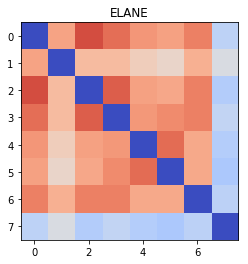

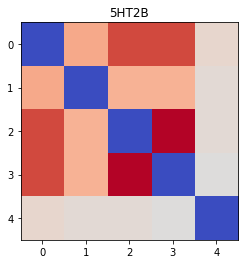

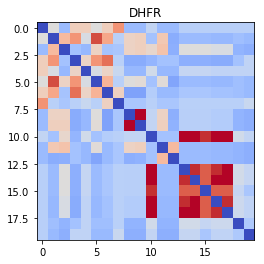

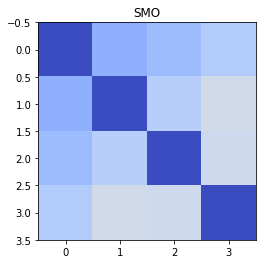

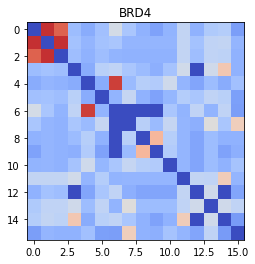

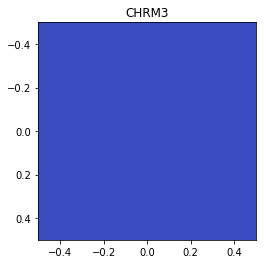

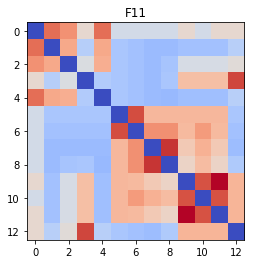

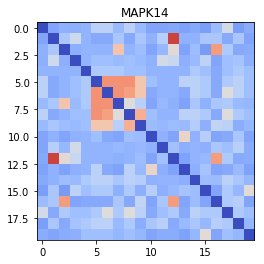

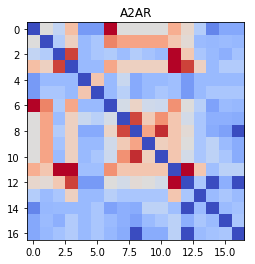

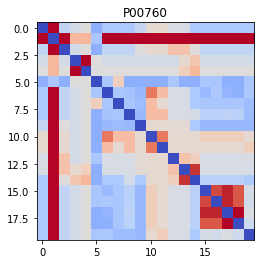

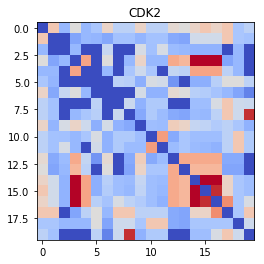

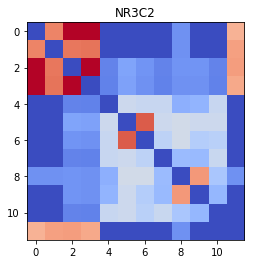

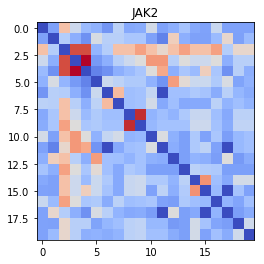

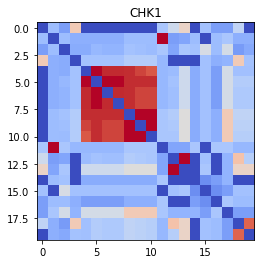

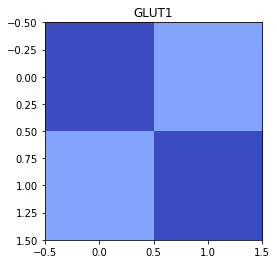

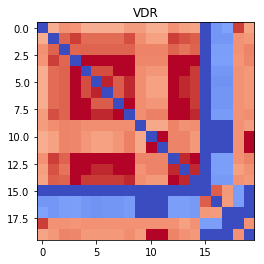

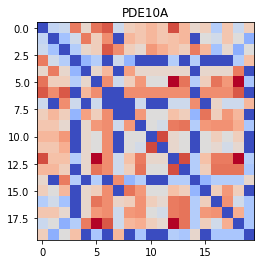

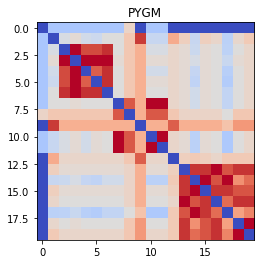

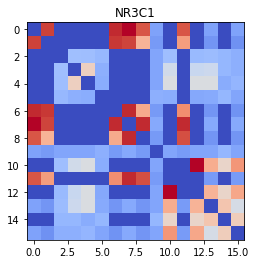

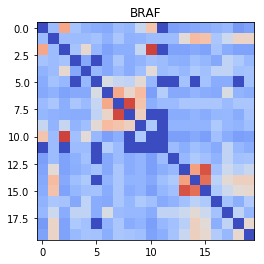

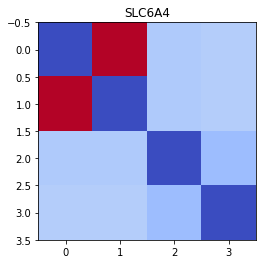

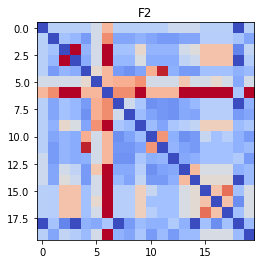

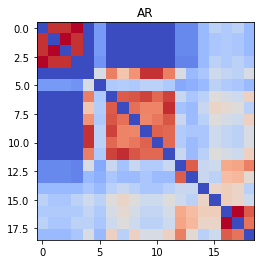

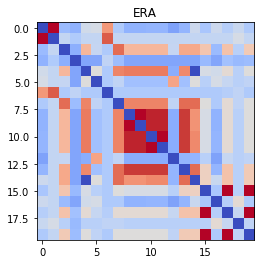

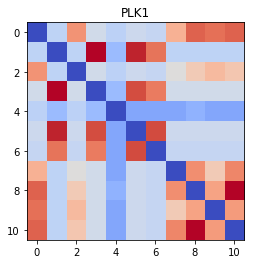

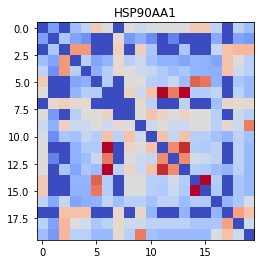

In [3]:
pdb = []
for protein in proteins:
    prot = Protein(protein)
    docked = prot.lm.get_xdocked_ligands(20)
    prot.lm.mcss.load_mcss()
    
    X = np.zeros((len(docked), len(docked)))
    for i, ligand1 in enumerate(docked):
        for j, ligand2 in enumerate(docked):
            if ligand1 == ligand2: continue
            m = prot.lm.mcss.get_mcss_size(ligand1, ligand2)
            
            if m is not None:
                X[i, j] = m
    plt.imshow(X, vmin = 0, vmax = 1, cmap = 'coolwarm')
    plt.title(protein)
    plt.show()
    
    
    pdb += list(np.concatenate([X[i+1:, i] for i in range(len(docked))]))

In [4]:
def plot(helpers_file):
    involving_query, not_involving_query = [], []
    for protein in proteins:
        prot = Protein(protein)
        query = prot.lm.get_xdocked_ligands(1)[0]
        helpers = prot.lm.get_helpers(query, helpers_file, 20)
        docked = [query] + helpers
        prot.load_docking(docked, load_mcss=True)

        X = np.zeros((len(docked), len(docked)))
        for i, ligand1 in enumerate(docked):
            for j, ligand2 in enumerate(docked):
                if ligand1 == ligand2: continue
                m = prot.lm.mcss.get_mcss_size(ligand1, ligand2)

                if m is not None:
                    X[i, j] = m
        plt.imshow(X, vmin = 0, vmax = 1, cmap = 'coolwarm')
        plt.title(protein)
        plt.show()

        involving_query += list(X[1:, 0])
        not_involving_query += list(np.concatenate([X[i+1:, i] for i in range(1, len(docked))]))

    plt.hist([pdb, involving_query, not_involving_query], normed=True, label=['pdb-pdb', 'query-helper', 'helper-helper'])
    plt.legend()
    plt.show()

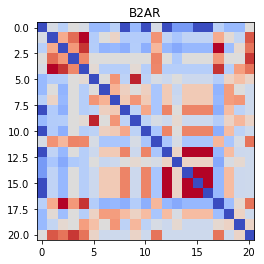

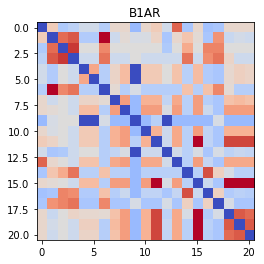

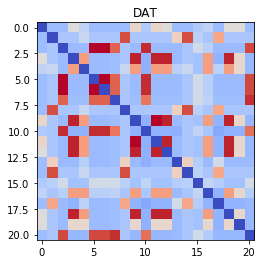

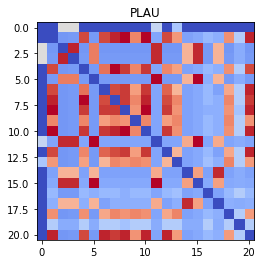

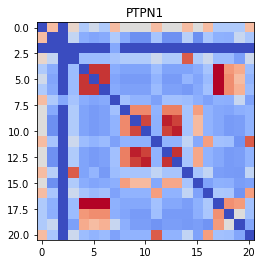

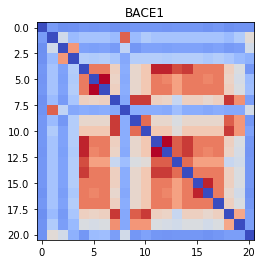

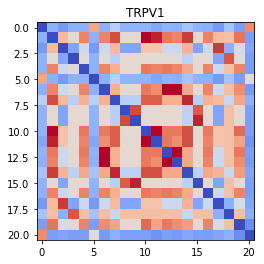

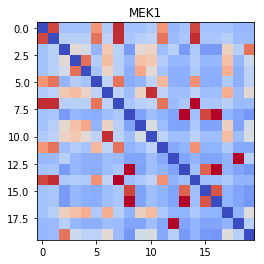

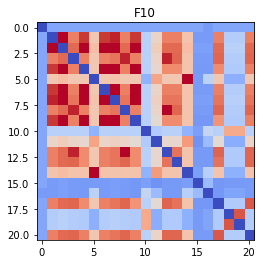

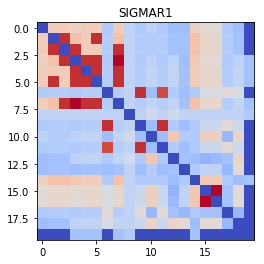

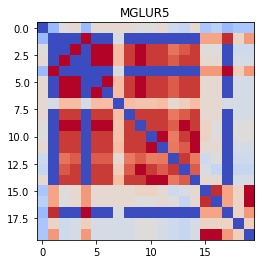

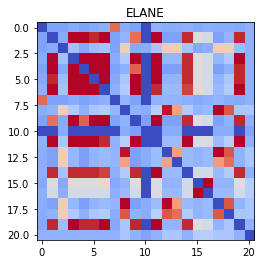

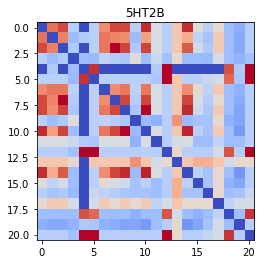

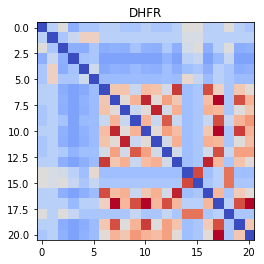

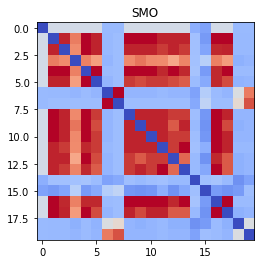

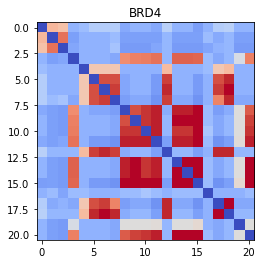

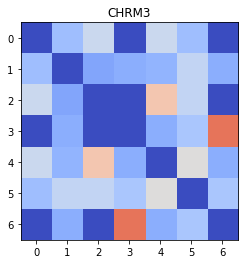

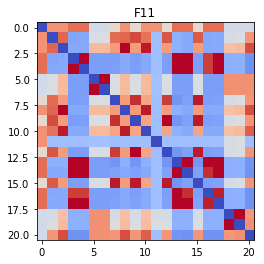

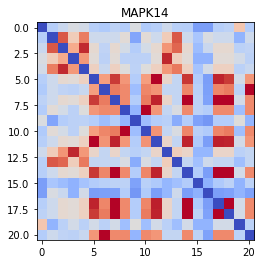

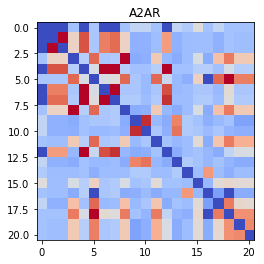

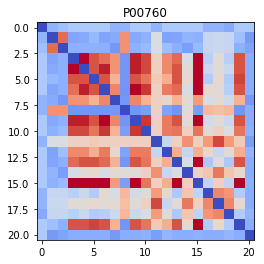

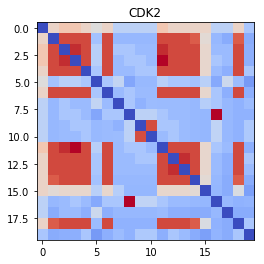

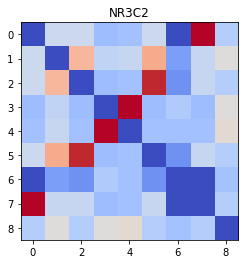

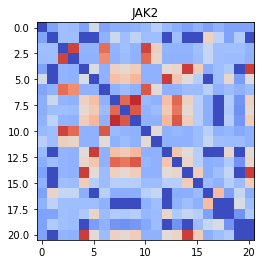

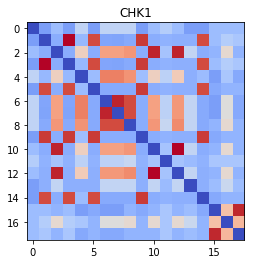

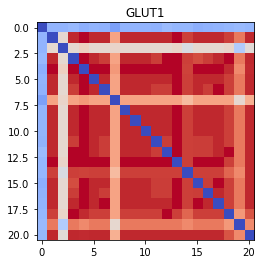

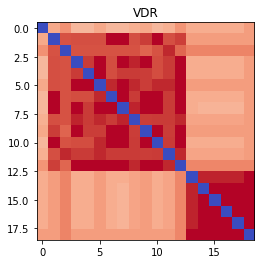

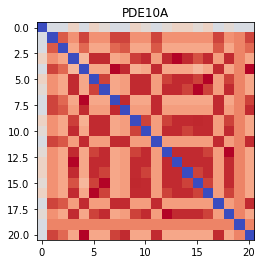

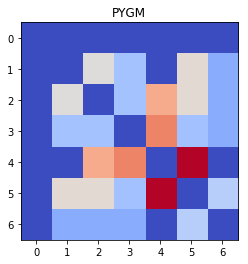

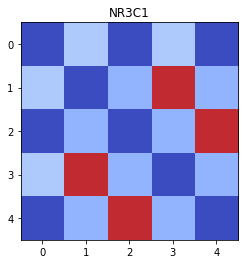

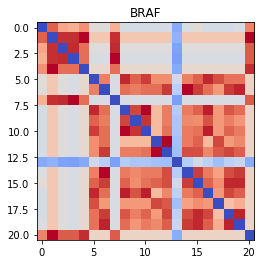

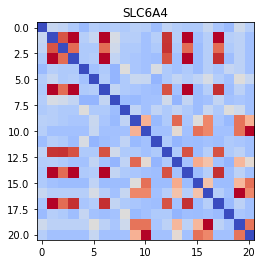

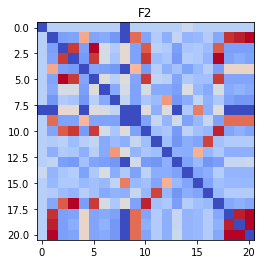

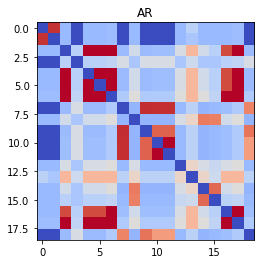

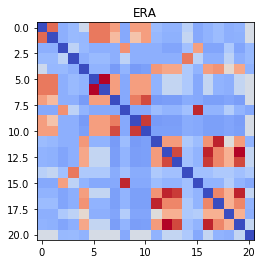

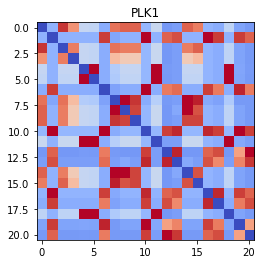

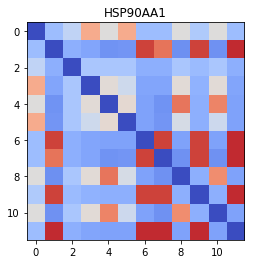

/Users/jpaggi/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


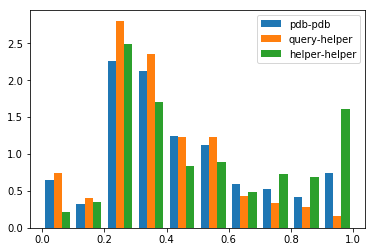

In [5]:
plot('best_affinity.txt')

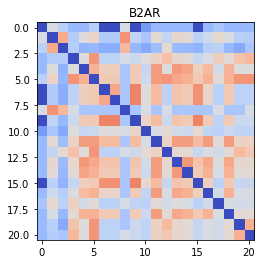

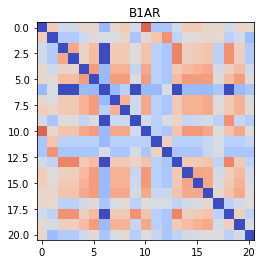

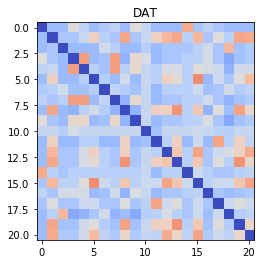

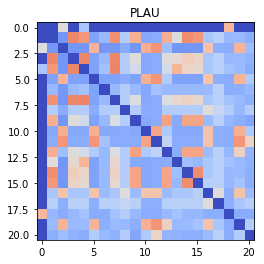

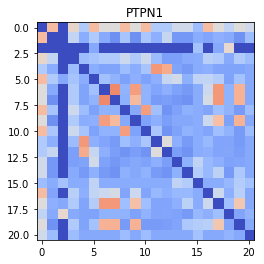

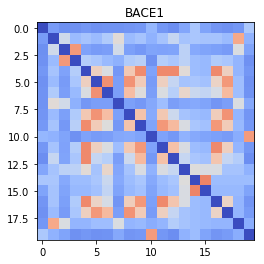

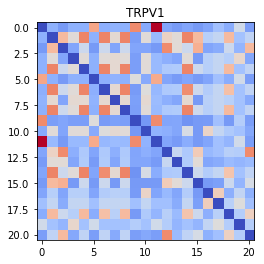

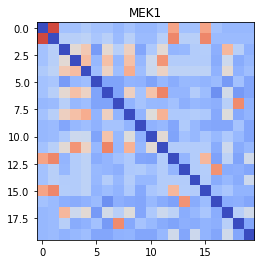

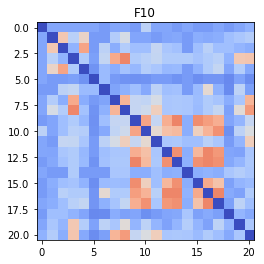

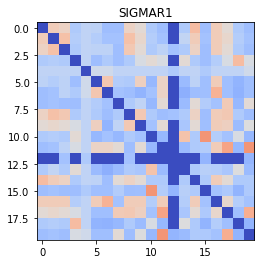

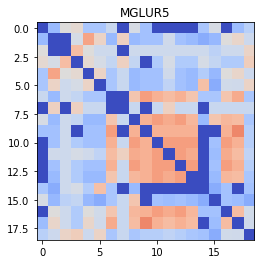

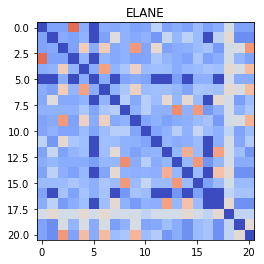

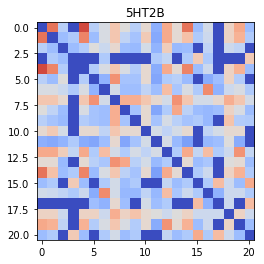

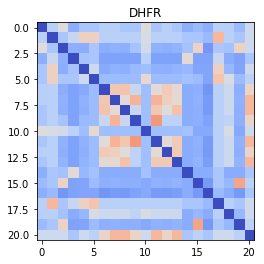

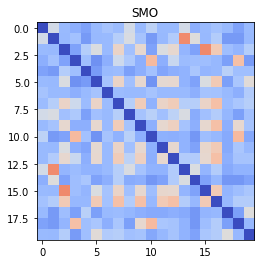

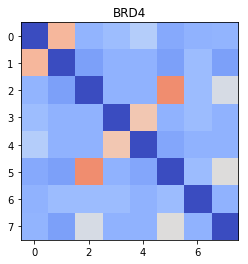

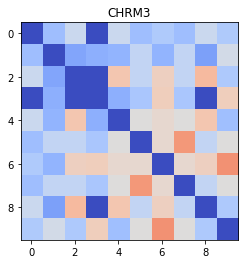

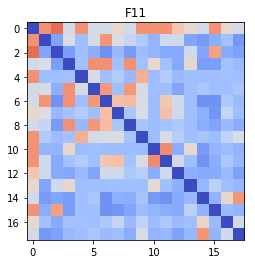

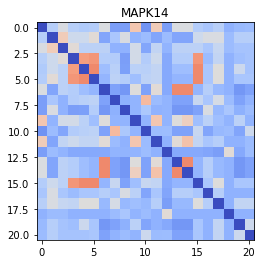

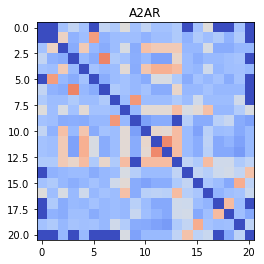

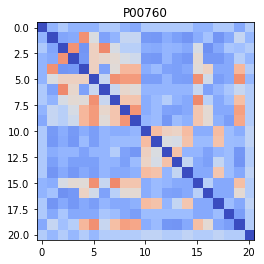

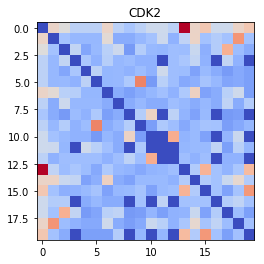

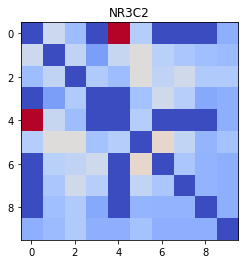

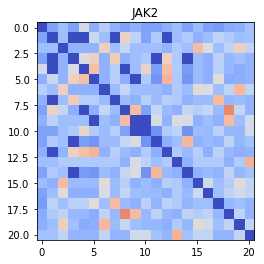

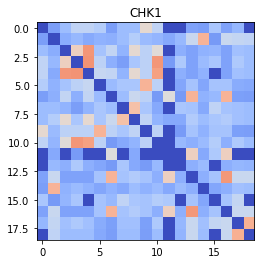

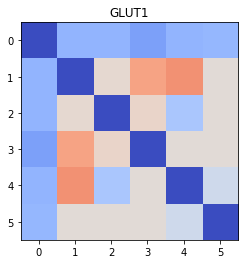

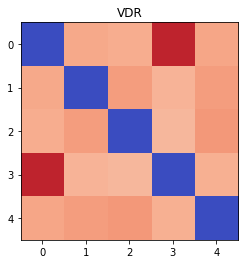

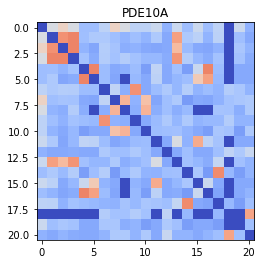

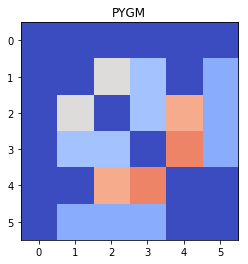

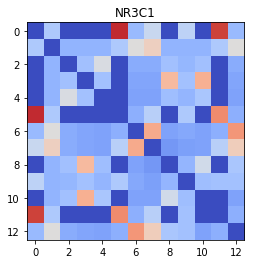

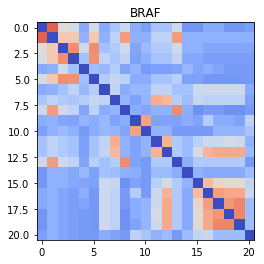

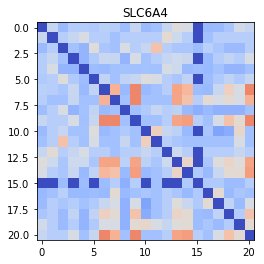

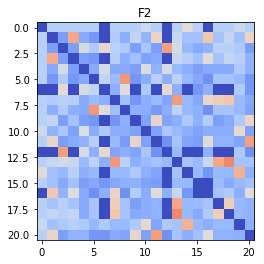

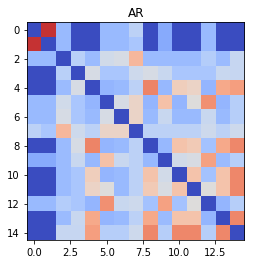

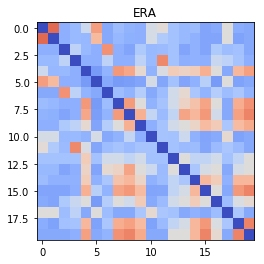

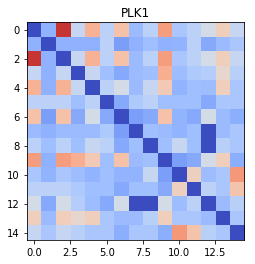

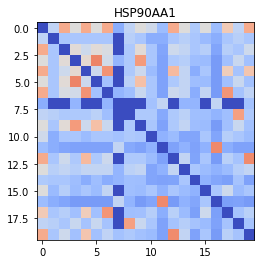

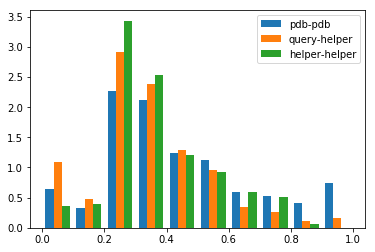

In [6]:
plot('best_affinity_diverse.txt')

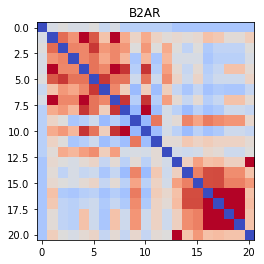

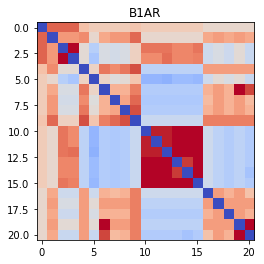

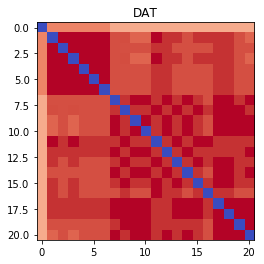

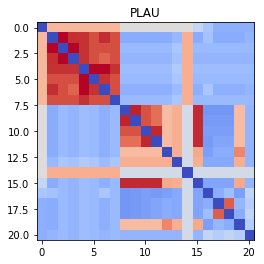

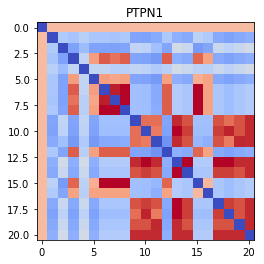

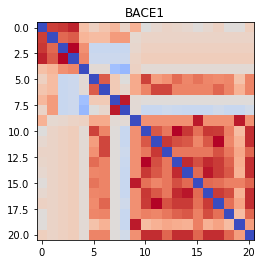

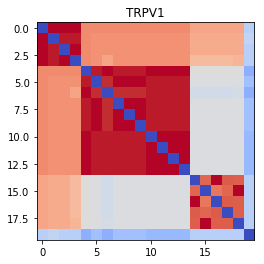

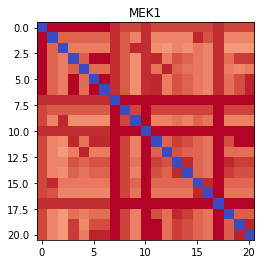

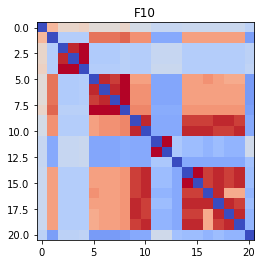

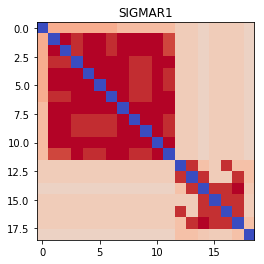

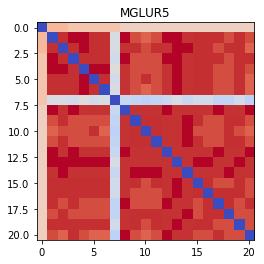

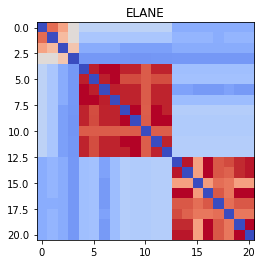

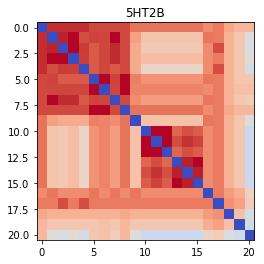

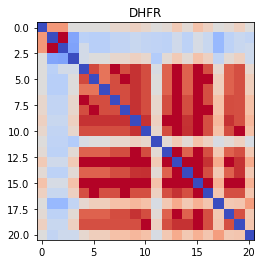

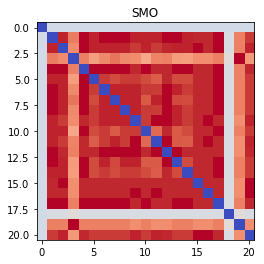

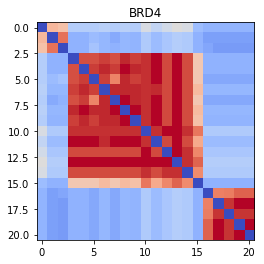

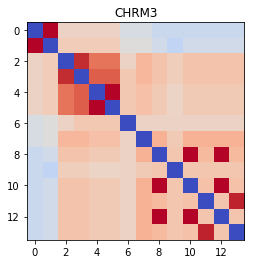

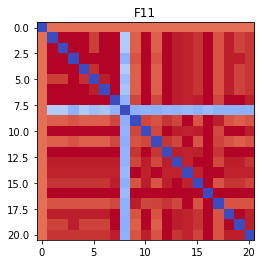

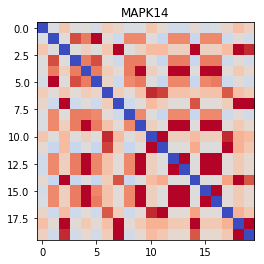

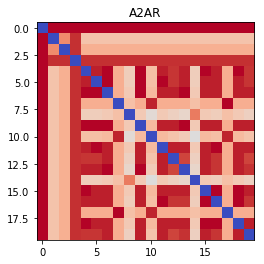

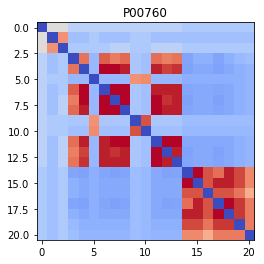

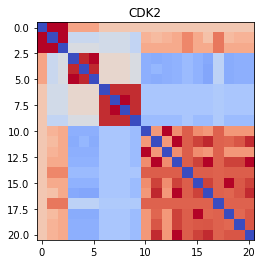

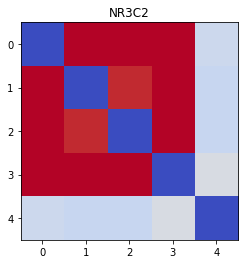

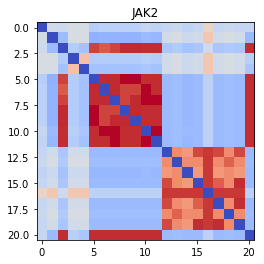

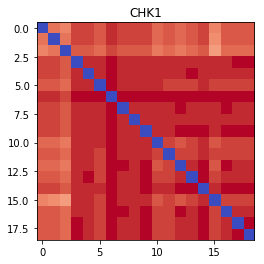

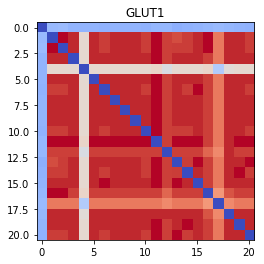

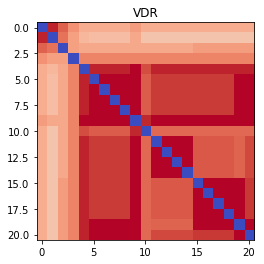

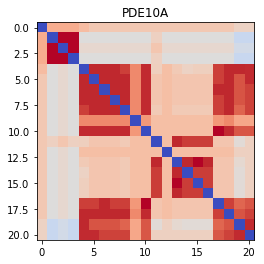

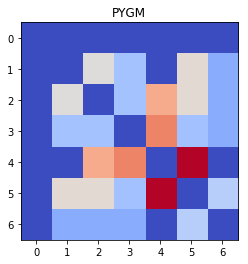

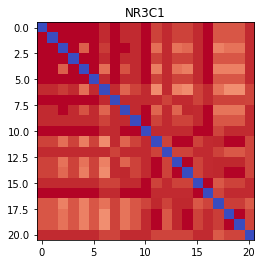

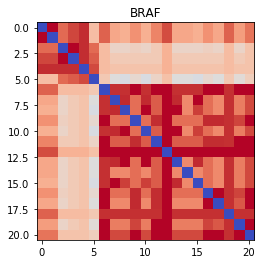

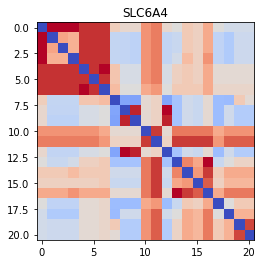

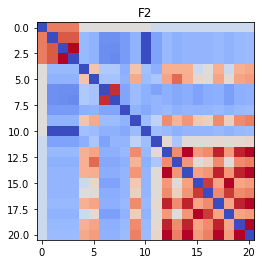

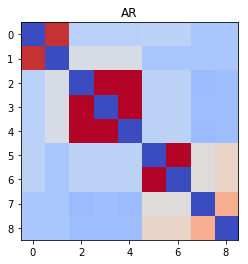

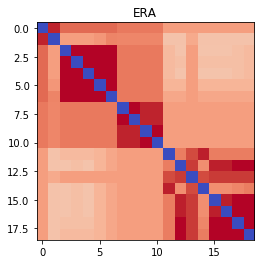

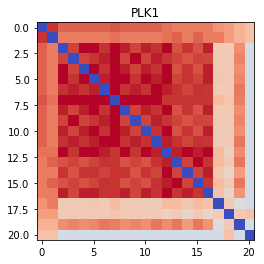

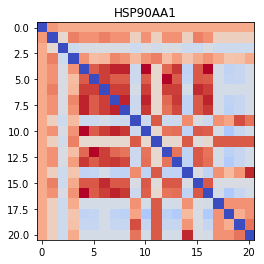

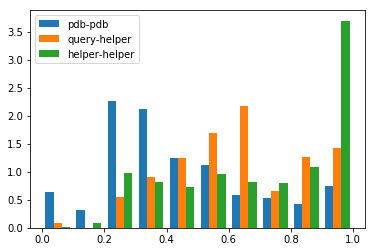

In [7]:
plot('best_mcss.txt')